<a href="https://colab.research.google.com/github/Brunapupo/llama2/blob/main/10_termos_mais_frequentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas openpyxl


In [2]:
import nltk
import nltk.corpus
from nltk.stem import RSLPStemmer
from nltk.tokenize import sent_tokenize
from string import punctuation
from collections import defaultdict
from heapq import nlargest
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import floresta
from nltk.corpus import machado
from bs4 import BeautifulStoneSoup, BeautifulSoup
import cgi


In [3]:
import pandas as pd

# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Definir o caminho dos arquivos CSV
capitulos_path = '/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/CID-10-CAPITULOS.CSV'
categorias_path = '/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/CID-10-CATEGORIAS.CSV'
grupos_path = '/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/CID-10-GRUPOS.CSV'
subcategorias_path = '/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/CID-10-SUBCATEGORIAS.CSV'

# Carregar os arquivos CSV com codificação 'latin1' e delimitador ';'
capitulos_df = pd.read_csv(capitulos_path, encoding='latin1', delimiter=';')
categorias_df = pd.read_csv(categorias_path, encoding='latin1', delimiter=';')
grupos_df = pd.read_csv(grupos_path, encoding='latin1', delimiter=';')
subcategorias_df = pd.read_csv(subcategorias_path, encoding='latin1', delimiter=';')

# Extrair termos relevantes para o dicionário
termos_cid = set()

# Adicionar termos de cada dataframe ao conjunto
termos_cid.update(capitulos_df['DESCRICAO'].str.lower().tolist())
termos_cid.update(categorias_df['DESCRICAO'].str.lower().tolist())
termos_cid.update(grupos_df['DESCRICAO'].str.lower().tolist())
termos_cid.update(subcategorias_df['DESCRICAO'].str.lower().tolist())

# Remover possíveis NaNs
termos_cid = {termo for termo in termos_cid if isinstance(termo, str)}

# Visualizar alguns termos
print(list(termos_cid)[:20])

# Salvar os termos em um novo arquivo CSV
termos_cid_df = pd.DataFrame(list(termos_cid), columns=['Termo'])
termos_cid_df.to_csv('/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/termos_cid.csv', index=False)

print("Dicionário de termos salvo em /content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/termos_cid.csv")


Mounted at /content/drive
['outras doenças reumáticas especificadas do coração', 'agressão por outros meios especificados - rua e estrada', 'seqüelas de efeitos tóxicos de substâncias de origem predominantemente não-medicinal', 'envenenamento [intoxicação] por e exposição a outros produtos químicos e substâncias nocivas e aos não especificados, intenção não determinada - área para a prática de esportes e atletismo', 'tireoidite', 'exposição a corrente elétrica não especificada - áreas industriais e em construção', 'queda no mesmo nível por escorregão, tropeção ou passos em falsos [traspés] - residência', 'distúrbios do metabolismo de glicoproteínas', 'microftalmia', 'lesão autoprovocada intencionalmente por vapor de água, gases ou objetos quentes - habitação coletiva', 'envenenamento [intoxicação] por e exposição a outros gases e vapores, intenção não determinada - outros locais especificados', 'deficiência de elementos nutrientes não especificados', 'lesão autoprovocada intencionalmen

In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Definir o caminho dos arquivos CSV
capitulos_path = '/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/CID-10-CAPITULOS.CSV'
categorias_path = '/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/CID-10-CATEGORIAS.CSV'
grupos_path = '/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/CID-10-GRUPOS.CSV'
subcategorias_path = '/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/CID-10-SUBCATEGORIAS.CSV'

# Carregar os arquivos CSV com codificação 'latin1' e delimitador ';'
capitulos_df = pd.read_csv(capitulos_path, encoding='latin1', delimiter=';')
categorias_df = pd.read_csv(categorias_path, encoding='latin1', delimiter=';')
grupos_df = pd.read_csv(grupos_path, encoding='latin1', delimiter=';')
subcategorias_df = pd.read_csv(subcategorias_path, encoding='latin1', delimiter=';')

# Inicializar stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

# Função para pré-processar os termos
def preprocess_term(term):
    # Tokenizar e remover pontuação
    tokens = [word.strip(string.punctuation) for word in term.split()]
    # Remover stop words
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return " ".join(filtered_tokens) if filtered_tokens else None

# Extrair e pré-processar termos relevantes para o dicionário
termos_cid = set()

# Adicionar termos de cada dataframe ao conjunto
termos_cid.update(capitulos_df['DESCRICAO'].dropna().str.lower().apply(preprocess_term).dropna().tolist())
termos_cid.update(categorias_df['DESCRICAO'].dropna().str.lower().apply(preprocess_term).dropna().tolist())
termos_cid.update(grupos_df['DESCRICAO'].dropna().str.lower().apply(preprocess_term).dropna().tolist())
termos_cid.update(subcategorias_df['DESCRICAO'].dropna().str.lower().apply(preprocess_term).dropna().tolist())

# Remover possíveis termos vazios
termos_cid = {termo for termo in termos_cid if termo.strip()}

# Visualizar alguns termos
print(list(termos_cid)[:20])

# Salvar os termos em um arquivo TXT
with open('/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/termos_cid.txt', 'w', encoding='utf-8') as f:
    for termo in termos_cid:
        f.write(f"{termo}\n")

print("Dicionário de termos salvo em /content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/termos_cid.txt")


Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['contato segadeira motorizada cortar aparar grama  habitação coletiva', 'varizes membros inferiores', 'paraplegia tetraplegia', 'tireoidite', 'sinovite tenossinovite doenças bacterianas classificadas outra parte', 'hemorragia subaracnóide proveniente artéria comunicante anterior', 'malformação congênita clitóris', 'exposição fogo controlado edifício outro tipo construção  área prática esportes atletismo', 'microftalmia', 'neuromiopatia neuropatia paraneoplásicas', 'impacto acidental ativo passivo causado outros objetos  habitação coletiva', 'transtornos nervo hipoglosso', 'dorsopatia deformante especificada', 'rastreamento pré-natal retardo crescimento feto ultrassom outros métodos físicos', 'outras fusões coluna vertebral', 'agressão meio impacto veículo motor  fazenda', 'ocupante triciclo motorizado traumatizado colisão trem comboio veículo ferroviário  condutor traumatizado acidente trânsito', 'traumatismo uretra', 'sialadenite', 'outras doenças cerebrovasculares']
Dicionário de te

In [5]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Definir o caminho dos arquivos CSV
capitulos_path = '/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/CID-10-CAPITULOS.CSV'
categorias_path = '/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/CID-10-CATEGORIAS.CSV'
grupos_path = '/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/CID-10-GRUPOS.CSV'
subcategorias_path = '/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/CID-10-SUBCATEGORIAS.CSV'

# Carregar os arquivos CSV com codificação 'latin1' e delimitador ';'
capitulos_df = pd.read_csv(capitulos_path, encoding='latin1', delimiter=';')
categorias_df = pd.read_csv(categorias_path, encoding='latin1', delimiter=';')
grupos_df = pd.read_csv(grupos_path, encoding='latin1', delimiter=';')
subcategorias_df = pd.read_csv(subcategorias_path, encoding='latin1', delimiter=';')

# Inicializar stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

# Função para pré-processar os termos
def preprocess_term(term):
    # Tokenizar e remover pontuação
    tokens = [word.strip(string.punctuation) for word in term.split()]
    # Remover stop words
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return " ".join(filtered_tokens) if filtered_tokens else None

# Extrair e pré-processar termos relevantes para o dicionário
termos_cid = set()

# Adicionar termos de cada dataframe ao conjunto
termos_cid.update(capitulos_df['DESCRICAO'].dropna().str.lower().apply(preprocess_term).dropna().tolist())
termos_cid.update(categorias_df['DESCRICAO'].dropna().str.lower().apply(preprocess_term).dropna().tolist())
termos_cid.update(grupos_df['DESCRICAO'].dropna().str.lower().apply(preprocess_term).dropna().tolist())
termos_cid.update(subcategorias_df['DESCRICAO'].dropna().str.lower().apply(preprocess_term).dropna().tolist())

# Remover possíveis termos vazios
termos_cid = {termo for termo in termos_cid if termo.strip()}

# Visualizar alguns termos
print(list(termos_cid)[:20])

# Salvar os termos em um arquivo TXT
with open('/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/termos_cid_refinado.txt', 'w', encoding='utf-8') as f:
    for termo in termos_cid:
        f.write(f"{termo}\n")

print("Dicionário de termos refinado salvo em /content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/termos_cid_refinado.txt")


Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['contato segadeira motorizada cortar aparar grama  habitação coletiva', 'varizes membros inferiores', 'paraplegia tetraplegia', 'tireoidite', 'sinovite tenossinovite doenças bacterianas classificadas outra parte', 'hemorragia subaracnóide proveniente artéria comunicante anterior', 'malformação congênita clitóris', 'exposição fogo controlado edifício outro tipo construção  área prática esportes atletismo', 'microftalmia', 'neuromiopatia neuropatia paraneoplásicas', 'impacto acidental ativo passivo causado outros objetos  habitação coletiva', 'transtornos nervo hipoglosso', 'dorsopatia deformante especificada', 'rastreamento pré-natal retardo crescimento feto ultrassom outros métodos físicos', 'outras fusões coluna vertebral', 'agressão meio impacto veículo motor  fazenda', 'ocupante triciclo motorizado traumatizado colisão trem comboio veículo ferroviário  condutor traumatizado acidente trânsito', 'traumatismo uretra', 'sialadenite', 'outras doenças cerebrovasculares']
Dicionário de te

# **2- Extrair Termos Relevantes e Criar um Dicionário de Tokens**
Vamos extrair os termos da coluna DESCRICAO e criar um conjunto de tokens:

In [6]:
# Extrair termos relevantes para o dicionário
termos_cid = set()

# Adicionar termos da coluna 'DESCRICAO' ao conjunto
termos_cid.update(categorias_df['DESCRICAO'].str.lower().tolist())

# Remover possíveis NaNs
termos_cid = {termo for termo in termos_cid if isinstance(termo, str)}

# Visualizar alguns termos
print(list(termos_cid)[:10])


['seqüelas de efeitos tóxicos de substâncias de origem predominantemente não-medicinal', 'doença hepática tóxica', 'não administração de cuidado médico e cirúrgico', 'neoplasia maligna do palato', 'facomatoses não classificadas em outra parte', 'episódios depressivos', 'tireoidite', 'transtornos relacionados com a gestação de curta duração e peso baixo ao nascer não classificados em outra parte', 'outras doenças do sangue e dos órgãos hematopoéticos', 'distúrbios do metabolismo de glicoproteínas']


# **stop_words:** Carrega a lista de stopwords em português e adiciona caracteres de pontuação e outras strings irrelevantes à lista.

In [7]:
import nltk

# Faça o download dos recursos necessários do NLTK
nltk.download('punkt')
nltk.download('rslp')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('floresta')
nltk.download('mac_morpho')
nltk.download('machado')
nltk.download('wordnet')
nltk.download('words')

# Inicializa o stemmer para português
stemmer = RSLPStemmer()
# Carrega a lista de stopwords em português
stop_words = nltk.corpus.stopwords.words('portuguese')
# Adiciona pontuação à lista de stopwords
stop_words = stop_words + list(punctuation)
stop_words = stop_words + ['\'\'', '\"\"', '\'', '\"', '``', '`', '\\n', 'p', '/p',
                           'ccedil', 'aacute','eacute','oacute','uacute', 'iacute', 'nbsp', 'br', 'span', '/span', 'otilde', 'atilde', 'div', '/div' ]
# Converte a lista de stopwords para um conjunto (para busca rápida)
stop_words_set = set(stop_words)

class text_color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package floresta to /root/nltk_data...
[nltk_data]   Unzipping corpora/floresta.zip.
[nltk_data] Downloading package mac_morpho to /root/nltk_data...
[nltk_data]   Unzipping corpora/mac_morpho.zip.
[nltk_data] Downloading package machado to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


# **Carregando o Dicionário de termos ordenado por Ocorrência em arquivo Único:**

In [8]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Lendo o dicionário de termos**

In [9]:
import pandas as pd

dict_path = '/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/dic-cid10/__Dicionário Único de Termos.txt'

df = pd.read_csv(dict_path)
df.head(50)

,abandono: 1
0,abdome agudo: 1
1,abortamento habitual: 1
2,aborto especificado: 1
3,aborto especificado completo especificado com...
4,aborto especificado completo especificado com...
5,aborto especificado completo especificado com...
6,aborto especificado completo especificado com...
7,aborto especificado completo especificado out...
8,aborto especificado incompleto complicado emb...
9,aborto especificado incompleto complicado hem...


In [10]:
termos_dict = {}

with open(dict_path, 'r', encoding='utf-8') as file:
    for line in file:
        term, freq = line.strip().split(': ')
        termos_dict[term.strip()] = int(freq)

In [11]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

teleconsultorias = '/content/drive/MyDrive/Documentos-stt/Teleconsultorias-anonimizadas-v1 - Teleconsultorias-anonimizadas-v1 (1).csv'
df = pd.read_csv(teleconsultorias)
df.head(50)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,pergunta,resposta,assunto,tipo,classificacao,especificacao,detalhamento,cid10,satisfacao_geral,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,0,"""em anexo \ncurativo [|PACIENTE|] a [|PACIENT...","""boa tarde enfª [|PACIENTE|] y, \n\n\n\nanexo ...","""curativo [|PACIENTE|] a [|PACIENTE|] [|PACIE...","""assíncrona""","""dúvidas clínicas gerais""","""s - pele""","""56 - curativo/bandagem/compressão/tamponamento""","""""","""""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13,[|PACIENTE|] teve febre reumática aos 5 anos ...,"""a duração da profilaxia depende da idade do p...","""profilaxia febre reumática""","""assíncrona""","""dúvidas clínicas gerais""","""k - aparelho circulatório""","""99 - outras doenças do aparelho circulatório""","""""","""insatisfeito(a)""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21,"""criança com 10 meses, refere episodio de aler...","""thalia, por ser cultivada em ovos embrionados...","""alergia a ovo""","""assíncrona""","""dúvidas clínicas gerais""","""a - geral e não-específico""","""92 - alergia/reação alérgica ne""","""""","""satisfeito(a)""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37,"""26 anos\n\n#consulta médica\n\n#tabagista 10c...","""raisa, o ministério da saúde preconiza que os...","""gravidez ectópica x anticoncepcional""","""assíncrona""","""dúvidas clínicas gerais""","""w - gravidez e planejamento familiar""","""80 - gravidez ectópica""","""""","""satisfeito(a)""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42,"""se há necessidade de revisão e/ou acompanhame...","""prezado colega\n\na manutenção da fav em paci...","""fistula arterio venosa""","""assíncrona""","""dúvidas clínicas gerais""","""u - aparelho urinário""","""67 - referenciado para médico/especialista/cl...","""""","""""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,48,"""hipotireoidismo . dúvida_ ajuste da dose do ...","""bom dia [|PACIENTE|] . \npelo que entendi, el...","""hipotireoidismo""","""assíncrona""","""dúvidas clínicas gerais""","""t - endócrino, metabólico e nutricional""","""86 - hipotiroidismo/mixedema""","""e03 - outros hipotireoidismos""","""muito satisfeito(a)""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,50,"""has + dm + amputação mid. em uso: furosemida ...","""boa tarde enfª [|PACIENTE|] , \n\n\nanexo req...","""curativo [|PACIENTE|]","""assíncrona""","""dúvidas clínicas gerais""","""a - geral e não-específico""","""56 - curativo/bandagem/compressão/tamponamento""","""""","""""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,52,"""#dm + has + hist de cirurgia em [|PACIENTE|] ...","""boa tarde enfª [|PACIENTE|] , \n\n\nanexo req...","""curativo [|PACIENTE|]","""assíncrona""","""dúvidas clínicas gerais""","""a - geral e não-específico""","""56 - curativo/bandagem/compressão/tamponamento""","""""","""""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,67,"""bom dia regulador .esta é a [|PACIENTE|] eira...","""pedro, desculpa a de [|PACIENTE|] para respon...","""escle [|PACIENTE|] ossea + ossiculo acessorio ""","""assíncrona""","""dúvidas clínicas gerais""","""l - sistema musculoesquelético""","""99 - outra doença do aparelho músculo-esquelé...","""m79 - outros transtornos dos tecidos moles, n...","""""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,74,[|PACIENTE|] com pequena alteração em enzimas...,"""elevação nos testes hepáticos\na alt é consid...","""alteração em enzimas hepáticas.""","""assíncrona""","""dúvidas clínicas gerais""","""d - aparelho digestivo (e/ou saúde bucal)""","""97 - doenças do fígado /ne""","""""","""muito satisfeito(a)""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Carregar o dicionário de termos
dict_path = '/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/dic-cid10/__Dicionário Único de Termos.txt'
termos_dict = {}

with open(dict_path, 'r', encoding='utf-8') as file:
    for line in file:
        term, freq = line.strip().split(': ')
        termos_dict[term.strip()] = int(freq)

# Carregar o arquivo de teleconsultorias
teleconsultorias_path = '/content/drive/MyDrive/Documentos-stt/Teleconsultorias-anonimizadas-v1 - Teleconsultorias-anonimizadas-v1 (1).csv'
df = pd.read_csv(teleconsultorias_path)

# Verificar as colunas do DataFrame
print(df.columns)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['Unnamed: 0', 'pergunta', 'resposta', 'assunto', 'tipo',
       'classificacao', 'especificacao', 'detalhamento', 'cid10',
       'satisfacao_geral', 'atendimento_duvida_principal',
       'evitou_encaminhamento', 'teleconsultor_sugeriu_encaminhamento',
       'intencao_encaminhar_paciente_apos_teleconsultoria', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27'],
      dtype='object')


# **Aplicando a especificação**

In [15]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Carregar o dicionário de termos
dict_path = '/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/dic-cid10/__Dicionário Único de Termos.txt'
termos_dict = {}

with open(dict_path, 'r', encoding='utf-8') as file:
    for line in file:
        term, freq = line.strip().split(': ')
        termos_dict[term.strip()] = int(freq)

# Carregar o arquivo de teleconsultorias
teleconsultorias_path = '/content/drive/MyDrive/Documentos-stt/Teleconsultorias-anonimizadas-v1 - Teleconsultorias-anonimizadas-v1 (1).csv'
df = pd.read_csv(teleconsultorias_path)

# Verificar as colunas do DataFrame
print(df.columns)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['Unnamed: 0', 'pergunta', 'resposta', 'assunto', 'tipo',
       'classificacao', 'especificacao', 'detalhamento', 'cid10',
       'satisfacao_geral', 'atendimento_duvida_principal',
       'evitou_encaminhamento', 'teleconsultor_sugeriu_encaminhamento',
       'intencao_encaminhar_paciente_apos_teleconsultoria', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27'],
      dtype='object')


**RESULTADO MELHOR!**

In [35]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re

# Carregar o dicionário de termos
dict_path = '/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/dic-cid10/__Dicionário Único de Termos.txt'
termos_dict = {}

with open(dict_path, 'r', encoding='utf-8') as file:
    for line in file:
        term, freq = line.strip().split(': ')
        termos_dict[term.strip()] = int(freq)

# Carregar o arquivo de teleconsultorias
teleconsultorias_path = '/content/drive/MyDrive/Documentos-stt/Teleconsultorias-anonimizadas-v1 - Teleconsultorias-anonimizadas-v1 (1).csv'
df = pd.read_csv(teleconsultorias_path)

# Configurar CountVectorizer com os termos do dicionário
vectorizer = CountVectorizer(vocabulary=termos_dict.keys(), lowercase=True)

# Extrair a coluna 'especificacao'
especificacoes = df['especificacao'].astype(str).tolist()
X = vectorizer.fit_transform(especificacoes)

# Obter a contagem dos termos
term_frequencies = X.sum(axis=0).A1
terms = vectorizer.get_feature_names_out()

# Criar um DataFrame com termos e suas frequências
term_freq_df = pd.DataFrame({'Termo': terms, 'Frequencia': term_frequencies})
term_freq_df = term_freq_df[term_freq_df['Frequencia'] > 0].sort_values(by='Frequencia', ascending=False).head(10)

# Exibir os resultados
print("Os 10 termos mais frequentes são:")
print(term_freq_df)

# Coletar as linhas associadas aos termos mais frequentes
dados = []

for termo in term_freq_df['Termo']:
    linhas_associadas = df[df['especificacao'].str.contains(re.escape(termo), case=False, na=False)]
    for _, row in linhas_associadas.iterrows():
        if len(dados) >= 10:
            break
        dados.append([row['pergunta'], row['resposta'], termo])
    if len(dados) >= 10:
        break

# Criar um DataFrame com as colunas 'Pergunta', 'Resposta' e 'Termo'
top_10_df = pd.DataFrame(dados, columns=['Pergunta', 'Resposta', 'Termo'])

# Salvar os resultados em um novo arquivo Excel
output_path = '/content/drive/MyDrive/resultado.xlsx'
top_10_df.to_excel(output_path, index=False)

# Mostrar o DataFrame
print("Top 10 termos mais frequentes com suas linhas associadas:")
print(top_10_df.head(10))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Os 10 termos mais frequentes são:
             Termo  Frequencia
5567  fibromialgia           1
Top 10 termos mais frequentes com suas linhas associadas:
                                            Pergunta  \
0  "<p>paciente j&aacute; faz acompanhamento na r...   

                                            Resposta         Termo  
0  "<p>bom dia</p>\n<p>realmente n&atilde;o ha ne...  fibromialgia  


In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Configurar o CountVectorizer com os termos do dicionário
vectorizer = CountVectorizer(vocabulary=termos_dict.keys(), lowercase=True)

# Ajuste a coluna aqui de acordo com o nome correto
especificacoes = df['especificacao'].astype(str).tolist()
X = vectorizer.transform(especificacoes)

# Obter a contagem dos termos
term_frequencies = X.sum(axis=0).A1
terms = vectorizer.get_feature_names_out()

# Criar um DataFrame com os termos e suas frequências
term_freq_df = pd.DataFrame({'Termo': terms, 'Frequencia': term_frequencies})
term_freq_df = term_freq_df.sort_values(by='Frequencia', ascending=False).head(10)

# Exibir os resultados
print("Os 10 termos mais frequentes são:")
print(term_freq_df)

# Coletar as linhas associadas aos termos mais frequentes
dados = []
for termo in term_freq_df['Termo']:
    linhas_associadas = df[df['especificacao'].str.contains(termo, case=False, na=False)]
    for _, row in linhas_associadas.iterrows():
        dados.append([termo, row['especificacao'], row['pergunta'], row['resposta']])

top_10_df = pd.DataFrame(dados, columns=['Termo', 'Especificacao', 'Pergunta', 'Resposta'])
print('top_10_dftop_10_dftop_10_dftop_10_dftop_10_dftop_10_dftop_10_df', top_10_df.head(10))

# Salvar os resultados em um novo Excel
output_path = '/content/drive/MyDrive/resultado.xlsx'
top_10_df.to_excel(output_path)

# Mostrar o DataFrame
print(top_10_df.head(10))


Os 10 termos mais frequentes são:
                                          Termo  Frequencia
5567                               fibromialgia           1
0                                      abandono           0
9586  outra hipersecreção hormônios intestinais           0
9575                         outra endometriose           0
9576                       outra entesopatia pé           0
9577       outra estenose estreitamento uretral           0
9578                   outra febre especificada           0
9579                         outra fisioterapia           0
9580                   outra forma doença crohn           0
9581                 outra forma doença hodgkin           0
top_10_dftop_10_dftop_10_dftop_10_dftop_10_dftop_10_dftop_10_df           Termo                                      Especificacao  \
0  fibromialgia  ] com fibromialgia e lesões discais em região ...   

                                            Pergunta  \
0  "<p>paciente j&aacute; faz acompanhamento 

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re

# Carregar o dicionário de termos
dict_path = '/mnt/data/__Dicionário Único de Termos.txt'
teleconsultorias_path = '/mnt/data/Teleconsultorias-anonimizadas-v1 - Teleconsultorias-anonimizadas-v1 (1).csv'

# Ler o arquivo de dicionário
termos_dict = {}
with open(dict_path, 'r', encoding='utf-8') as file:
    for line in file:
        term, freq = line.strip().split(': ')
        termos_dict[term.strip()] = int(freq)

# Ler o arquivo CSV de teleconsultorias
df = pd.read_csv(teleconsultorias_path)

# Configurar CountVectorizer com os termos do dicionário
vectorizer = CountVectorizer(vocabulary=termos_dict.keys(), lowercase=True)

# Extrair a coluna 'especificacao'
especificacoes = df['especificacao'].astype(str).tolist()
X = vectorizer.fit_transform(especificacoes)

# Obter a contagem dos termos
term_frequencies = X.sum(axis=0).A1
terms = vectorizer.get_feature_names_out()

# Criar um DataFrame com termos e suas frequências
term_freq_df = pd.DataFrame({'Termo': terms, 'Frequencia': term_frequencies})
term_freq_df = term_freq_df[term_freq_df['Frequencia'] > 0].sort_values(by='Frequencia', ascending=False).head(10)

# Exibir os resultados
print("Os 10 termos mais frequentes são:")
print(term_freq_df)

# Coletar as linhas associadas aos termos mais frequentes
dados = []
termos_encontrados = set()

for termo in term_freq_df['Termo']:
    linhas_associadas = df[df['especificacao'].str.contains(re.escape(termo), case=False, na=False)]
    for _, row in linhas_associadas.iterrows():
        if len(dados) >= 10:
            break
        dados.append([row['pergunta'], row['resposta'], termo])
        termos_encontrados.add(termo)
    if len(dados) >= 10:
        break

# Verificar se temos termos suficientes
if len(dados) < 10:
    for termo in termos_dict.keys():
        if termo not in termos_encontrados:
            linhas_associadas = df[df['especificacao'].str.contains(re.escape(termo), case=False, na=False)]
            for _, row in linhas_associadas.iterrows():
                if len(dados) >= 10:
                    break
                dados.append([row['pergunta'], row['resposta'], termo])
            if len(dados) >= 10:
                break

# Criar um DataFrame com as colunas 'Pergunta', 'Resposta' e 'Termo'
top_10_df = pd.DataFrame(dados, columns=['Pergunta', 'Resposta', 'Termo'])

# Salvar os resultados em um novo arquivo Excel
output_path = '/mnt/data/resultado.xlsx'
top_10_df.to_excel(output_path, index=False)

# Mostrar o DataFrame
print("Top 10 termos mais frequentes com suas linhas associadas:")
top_10_df.head(10)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/__Dicionário Único de Termos.txt'

## **MELHOR RESULTADO! **

In [45]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Carregar o dicionário de termos
dict_path = '/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/dic-cid10/__Dicionário Único de Termos.txt'
termos_dict = {}

with open(dict_path, 'r', encoding='utf-8') as file:
    for line in file:
        term, freq = line.strip().split(': ')
        termos_dict[term.strip()] = int(freq)

# Carregar o arquivo de teleconsultorias
teleconsultorias_path = '/content/drive/MyDrive/Documentos-stt/Teleconsultorias-anonimizadas-v1 - Teleconsultorias-anonimizadas-v1 (1).csv'
df = pd.read_csv(teleconsultorias_path)

# Verificar os nomes das colunas
print("Nomes das colunas no dataframe:", df.columns)

# Definir o nome da coluna de especificação
coluna_especificacao = 'especificacao'

# Definir uma função para limpar e processar o texto usando str.replace()
def clean_text(text):
    text = text.lower()
    text = text.replace('.', '').replace(',', '').replace(';', '').replace(':', '').replace('!', '').replace('?', '')
    text = text.replace('(', '').replace(')', '').replace('[', '').replace(']', '').replace('{', '').replace('}', '')
    return text

# Limpar a coluna 'especificacao'
df['especificacao_limpa'] = df[coluna_especificacao].apply(clean_text)

# Criar um CountVectorizer com os termos do dicionário
vectorizer = CountVectorizer(vocabulary=termos_dict.keys())
X = vectorizer.fit_transform(df['especificacao_limpa'])

# Somar as ocorrências de cada termo
term_frequencies = X.sum(axis=0)
terms_freq_dict = {term: term_frequencies[0, idx] for term, idx in vectorizer.vocabulary_.items()}

# Adicionar uma nova coluna com a soma das frequências dos termos em cada linha
df['frequencia_termos'] = X.sum(axis=1)

# Filtrar as 10 linhas com as maiores frequências de termos
top_10_df = df.nlargest(10, 'frequencia_termos')

# Salvar o dataframe filtrado em um novo arquivo Excel
output_path = '/content/drive/MyDrive/Documentos-stt/top_10_teleconsultorias.xlsx'
top_10_df.to_excel(output_path, index=False)

print(f"As 10 linhas filtradas foram salvas em {output_path}")


Mounted at /content/drive
Nomes das colunas no dataframe: Index(['Unnamed: 0', 'pergunta', 'resposta', 'assunto', 'tipo',
       'classificacao', 'especificacao', 'detalhamento', 'cid10',
       'satisfacao_geral', 'atendimento_duvida_principal',
       'evitou_encaminhamento', 'teleconsultor_sugeriu_encaminhamento',
       'intencao_encaminhar_paciente_apos_teleconsultoria', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27'],
      dtype='object')
As 10 linhas filtradas foram salvas em /content/drive/MyDrive/Documentos-stt/top_10_teleconsultorias.xlsx


In [44]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Carregar o dicionário de termos
dict_path = '/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/dic-cid10/__Dicionário Único de Termos.txt'
termos_dict = {}

with open(dict_path, 'r', encoding='utf-8') as file:
    for line in file:
        term, freq = line.strip().split(': ')
        termos_dict[term.strip()] = int(freq)

# Carregar o arquivo de teleconsultorias
teleconsultorias_path = '/content/drive/MyDrive/Documentos-stt/Teleconsultorias-anonimizadas-v1 - Teleconsultorias-anonimizadas-v1 (1).csv'
df = pd.read_csv(teleconsultorias_path)

# Verificar os nomes das colunas
print("Nomes das colunas no dataframe:", df.columns)

# Ajustar o nome da coluna para o nome correto
coluna_especificacao = 'especificacao'

# Definir uma função para limpar e processar o texto usando str.replace()
def clean_text(text):
    text = text.lower()
    text = text.replace('.', '').replace(',', '').replace(';', '').replace(':', '').replace('!', '').replace('?', '')
    text = text.replace('(', '').replace(')', '').replace('[', '').replace(']', '').replace('{', '').replace('}', '')
    return text

# Limpar a coluna 'especificacao'
df['especificacao_limpa'] = df[coluna_especificacao].apply(clean_text)

# Criar um CountVectorizer com os termos do dicionário
vectorizer = CountVectorizer(vocabulary=termos_dict.keys())
X = vectorizer.fit_transform(df['especificacao_limpa'])

# Somar as ocorrências de cada termo
term_frequencies = X.sum(axis=0)
terms_freq_dict = {term: term_frequencies[0, idx] for term, idx in vectorizer.vocabulary_.items()}

# Adicionar uma nova coluna com a soma das frequências dos termos em cada linha
df['frequencia_termos'] = X.sum(axis=1)

# Filtrar as 10 linhas com as maiores frequências de termos
top_10_df = df.nlargest(10, 'frequencia_termos')

# Selecionar apenas as colunas desejadas
colunas_desejadas = ['pergunta', 'resposta', 'especificacao', 'frequencia_termos']
top_10_df = top_10_df[colunas_desejadas]

# Salvar o dataframe filtrado em um novo arquivo Excel
output_path = '/content/drive/MyDrive/Documentos-stt/10_teleconsultorias.xlsx'
top_10_df.to_excel(output_path, index=False)

print(f"As 10 linhas filtradas foram salvas em {output_path}")


Mounted at /content/drive
Nomes das colunas no dataframe: Index(['Unnamed: 0', 'pergunta', 'resposta', 'assunto', 'tipo',
       'classificacao', 'especificacao', 'detalhamento', 'cid10',
       'satisfacao_geral', 'atendimento_duvida_principal',
       'evitou_encaminhamento', 'teleconsultor_sugeriu_encaminhamento',
       'intencao_encaminhar_paciente_apos_teleconsultoria', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27'],
      dtype='object')
As 10 linhas filtradas foram salvas em /content/drive/MyDrive/Documentos-stt/10_teleconsultorias.xlsx


In [46]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Carregar o dicionário de termos
dict_path = '/content/drive/MyDrive/Documentos-stt/Dicionário-de-termos/dic-cid10/__Dicionário Único de Termos.txt'
termos_dict = {}

with open(dict_path, 'r', encoding='utf-8') as file:
    for line in file:
        term, freq = line.strip().split(': ')
        termos_dict[term.strip()] = int(freq)

# Carregar o arquivo de teleconsultorias
teleconsultorias_path = '/content/drive/MyDrive/Documentos-stt/Teleconsultorias-anonimizadas-v1 - Teleconsultorias-anonimizadas-v1 (1).csv'
df = pd.read_csv(teleconsultorias_path)

# Verificar os nomes das colunas
print("Nomes das colunas no dataframe:", df.columns)

# Ajustar o nome da coluna para o nome correto
coluna_especificacao = 'especificacao'

# Definir uma função para limpar e processar o texto usando str.replace()
def clean_text(text):
    text = text.lower()
    text = text.replace('.', '').replace(',', '').replace(';', '').replace(':', '').replace('!', '').replace('?', '')
    text = text.replace('(', '').replace(')', '').replace('[', '').replace(']', '').replace('{', '').replace('}', '')
    return text

# Limpar a coluna 'especificacao'
df['especificacao_limpa'] = df[coluna_especificacao].apply(clean_text)

# Criar um CountVectorizer com os termos do dicionário
vectorizer = CountVectorizer(vocabulary=termos_dict.keys())
X = vectorizer.fit_transform(df['especificacao_limpa'])

# Somar as ocorrências de cada termo
term_frequencies = X.sum(axis=0)
terms_freq_dict = {term: term_frequencies[0, idx] for term, idx in vectorizer.vocabulary_.items()}

# Adicionar uma nova coluna com a soma das frequências dos termos em cada linha
df['frequencia_termos'] = X.sum(axis=1)

# Filtrar as 10 linhas com as maiores frequências de termos
top_10_df = df.nlargest(10, 'frequencia_termos')

# Adicionar a quantidade de termos em cada linha
top_10_df['quantidade_termos'] = top_10_df['frequencia_termos']

# Selecionar apenas as colunas desejadas
colunas_desejadas = ['pergunta', 'resposta', 'especificacao', 'frequencia_termos', 'quantidade_termos']
top_10_df = top_10_df[colunas_desejadas]

# Salvar o dataframe filtrado em um novo arquivo Excel
output_path = '/content/drive/MyDrive/Documentos-stt/qtd_termos_10_teleconsultorias_atualizado.xlsx'
top_10_df.to_excel(output_path, index=False)

print(f"As 10 linhas filtradas foram salvas em {output_path}")

# Mostrar o DataFrame atualizado
print(top_10_df.head(10))


Mounted at /content/drive
Nomes das colunas no dataframe: Index(['Unnamed: 0', 'pergunta', 'resposta', 'assunto', 'tipo',
       'classificacao', 'especificacao', 'detalhamento', 'cid10',
       'satisfacao_geral', 'atendimento_duvida_principal',
       'evitou_encaminhamento', 'teleconsultor_sugeriu_encaminhamento',
       'intencao_encaminhar_paciente_apos_teleconsultoria', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27'],
      dtype='object')
As 10 linhas filtradas foram salvas em /content/drive/MyDrive/Documentos-stt/qtd_termos_10_teleconsultorias_atualizado.xlsx
                                                pergunta  \
30860  "<p>paciente j&aacute; faz acompanhamento na r...   
0      "em anexo  \ncurativo [|PACIENTE|] a [|PACIENT...   
1       [|PACIENTE|] teve febre reumática aos 5 anos ...

Mounted at /content/drive
Nomes das colunas no dataframe: Index(['pergunta', 'resposta', 'especificacao'], dtype='object')


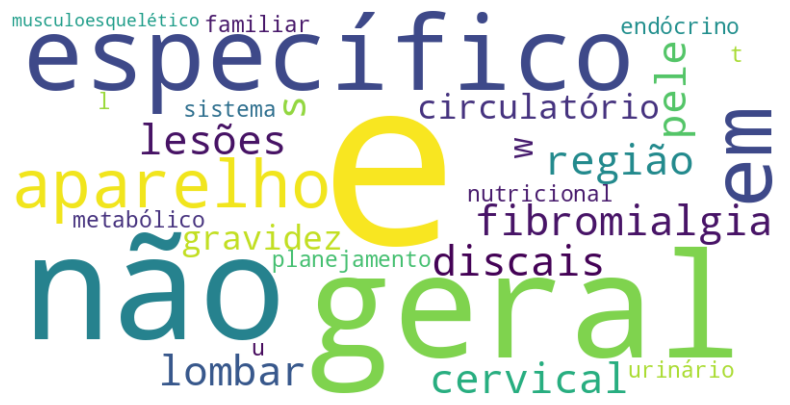

In [3]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Carregar o arquivo de teleconsultorias
teleconsultorias_path = '/content/drive/MyDrive/Documentos-stt/10_perguntas_mais_frequentes_teleconsultoria.csv'
df = pd.read_csv(teleconsultorias_path)

# Verificar os nomes das colunas
print("Nomes das colunas no dataframe:", df.columns)

# Ajustar o nome da coluna para o nome correto
coluna_especificacao = 'especificacao'

# Definir uma função para limpar e processar o texto usando str.replace()
def clean_text(text):
    text = text.lower()
    text = text.replace('.', '').replace(',', '').replace(';', '').replace(':', '').replace('!', '').replace('?', '')
    text = text.replace('(', '').replace(')', '').replace('[', '').replace(']', '').replace('{', '').replace('}', '')
    return text

# Limpar a coluna 'especificacao'
df['especificacao_limpa'] = df[coluna_especificacao].apply(clean_text)

# Concatenar todos os textos da coluna 'especificacao_limpa' em uma única string
all_text = ' '.join(df['especificacao_limpa'].tolist())

# Gerar a nuvem de termos
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Exibir a nuvem de termos
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
